In [93]:
#packages
import pandas as pd 
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,precision_score, recall_score, accuracy_score
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sn
import matplotlib.pyplot as plt

In [98]:
#reading the titatnic dataset
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
X=df[['Pclass','Sex','Age','Fare']]
X.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [100]:
#checking the count of null values in Age
X['Age'].isnull().values.sum()

177

In [101]:
#filling the na age values with mean age
X.Age.fillna(X.Age.mean(),inplace=True)
X.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [102]:
#target variable
y=df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [103]:
le_sex = LabelEncoder()

In [104]:
#encoding the Sex column because it contains text
X['le_sex']=le_sex.fit_transform(X['Sex'])
X.head()

,Pclass,Sex,Age,Fare,le_sex
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [105]:
X.drop('Sex',axis='columns',inplace=True)
X.head()

,Pclass,Age,Fare,le_sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [107]:
#split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=10)
X_train.head()

,Pclass,Age,Fare,le_sex
580,2,25.000000,30.000,0
415,3,29.699118,8.050,0
616,3,34.000000,14.400,1
839,1,29.699118,29.700,1
742,1,21.000000,262.375,0


In [108]:
#fitting the model
dc_model=tree.DecisionTreeClassifier()
dc_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [109]:
#making predictions on the test set
y_pred=dc_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0], dtype=int64)

In [110]:
print("Accuracy of model is {:.2%}".format(accuracy_score(y_test,y_pred)))

Accuracy of model is 76.12%


In [111]:
#generating the confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[64, 18],
       [14, 38]], dtype=int64)

Text(69.0, 0.5, 'Truth')

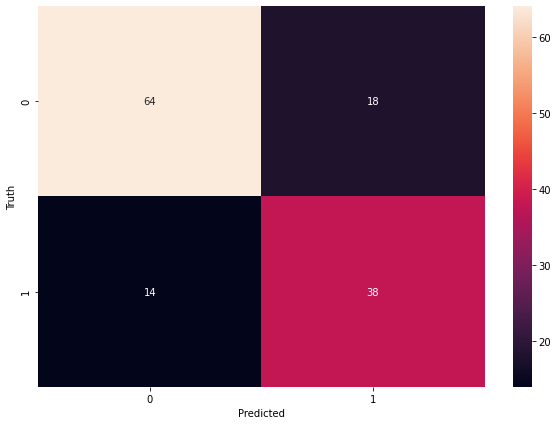

In [112]:
#visualizing the confusion matrix
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')